Premier League Data Analyser by Student 469104

In [1]:
# This script appends new data to an existing Excel file containing football club stats for Luton from the 23/24 Premier league season.

import pandas as pd
import os

#Get the current working directory
current_dir = os.getcwd()

#Define the path to the 'data' folder
data_folder = os.path.join(current_dir, "Data")

# Existing Excel file
file_path = os.path.join(data_folder, "Luton Stats.xlsx")

# New data to append
new_data = pd.DataFrame({
    'Season': ['23/24'],
    'Team': ['Luton'],
    'Table Position': [18],
    'Points': [26],
    'Matches Played': [38],
    'Wins': [6],
    'Losses': [24],
    'Draws': [8],
    'Goals For': [52],
    'Goals Against': [85],
    'Goal Difference': [-33],
    'Top Scorer': ['Carlton Morris'],
    'Red Cards': [0],
    'Yellow Cards': [71]})

# Read the existing Excel file
df_existing = pd.read_excel(file_path)

# Append the new data to the existing DataFrame
df_new = pd.DataFrame(new_data)
df_combined = pd.concat([df_existing, df_new], ignore_index=True)

# Write the updated DataFrame back to the Excel file
df_combined.to_excel(file_path, index=False)

In [4]:
# This script combines existing Excel files into a single Excel file containing data for different football clubs for the 23/24 and 24/25 Premier league seasons.

import pandas as pd
import os

#Get the current working directory
current_dir = os.getcwd()

#Define the path to the 'data' folder
data_folder = os.path.join(current_dir, "Data")
file_path_combined = os.path.join(data_folder, "Combined Football Club Stats.xlsx")

# List of file paths for the football club stats
def main():
# List of team names
 team_names = [
    "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton", "Burnley",
    "Chelsea", "Crystal Palace", "Everton", "Fulham", "Ipswich", "Leicester",
    "Liverpool", "Luton", "Manchester City", "Manchester United", "Newcastle",
    "Nottingham", "Sheffield United", "Southampton", "Tottenham", "West Ham", "Wolverhampton"
    ]
 # Automatically generate the file paths using os.path.join
 file_paths = [os.path.join(data_folder, f"{team} Stats.xlsx") for team in team_names] 

 # Combine the data
 combined_df = pd.DataFrame()
 for path, team in zip(file_paths, team_names):
   if os.path.exists(path):
       df = pd.read_excel(path)
       combined_df = pd.concat([combined_df, df], ignore_index=True)

 # Drop rows with missing values (if needed)
 combined_df.dropna(inplace=True)

 # Save the combined dataframe to an Excel file
 output_path = os.path.join(data_folder, "Combined Football Club Stats.xlsx")
 combined_df.to_excel(output_path, index=False)
 
if __name__ == "__main__":
   main()

Welcome to the Premier League Data Analyser!
------------------------------
Main Menu
Options:
1. View team stats
2. View league standings
3. View graphs
4. Exit the Premier League Data Analyser
------------------------------
Welcome to the Graphs Viewer!
You can view various graphs related to the Premier League 23/24 and 24/25 season stats.
------------------------------
Which graph do you want to view for?
Options:
1. Yellow and Red Cards- Bar Chart
2. Wins, Losses, and Draws- Pie Chart
3. Wins against Yellow Cards- Scatter Plot
4. Goal Difference against Points- Contour Plot
5. Return to Main Menu
------------------------------
You chose Goal Difference against Points Contour Plot for...
------------------------------
Which season do you want to view 4 graph for?
Options:
1. 24/25
2. 23/24
3. Return to Graphs Viewer
4. Return to Main Menu
------------------------------
You chose the 24/25 season for 4 graph...
------------------------------
4 for 24/25 Season
-----------------------

SystemExit: 1

c:\Users\eviem\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


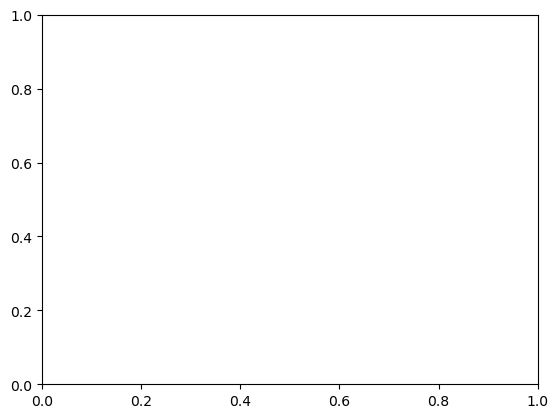

In [3]:
# This script is a user interface for viewing football club stats, league standings and graphs.

import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore, Style
from tabulate import tabulate
import sys
import os 

# Placeholder functions for displaying stats, standings, and graphs
def display_season_stats(team_name, season):
    print(f"Loading stats for {team_name} {season}...")
def display_league_standings():
    print("Showing league standings (function not yet implemented).")
def display_graphs():
    print("Displaying graphs (function not yet implemented).")

def divider():
    print("-" * 30)

def print_header(text):
    divider()
    print(Fore.RED + text + Fore.RESET)
    divider()

# Load the Combined Football Stats Excel file
#Get the current working directory
current_dir = os.getcwd()

#Define the path to the 'data' folder
data_folder = os.path.join(current_dir, "Data")
file_path_combined = os.path.join(data_folder, "Combined Football Club Stats.xlsx")
try:
   data = pd.read_excel(file_path_combined)
except Exception as e:
   print(Fore.RED + f"Error loading Excel file: {e}" + Fore.RESET)
   sys.exit(1)

# List of valid team names
valid_teams = [
   "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton", "Burnley", "Chelsea", "Crystal Palace",
   "Everton", "Fulham", "Ipswich", "Leicester", "Liverpool", "Luton", "Manchester City", "Manchester United",
   "Newcastle", "Nottingham", "Sheffield United", "Southampton", "Tottenham", "West Ham", "Wolverhampton"
]

# Navigation options for team stats viewer and season selection
def navigation_options_team_stats(team_name):
   divider()
   print("Navigation Options:")
   print("1. Return to Team Stats Viewer")
   print(f"2. Return to Season Selection for {Fore.RED}{team_name}{Fore.RESET}")
   print("3. Return to Main Menu")
   print("4. Exit the Premier League Data Analyser")
   navigation_input = input("Enter your choice (1/2/3/4): ").strip()
 
   if navigation_input == "1":
       divider()
       print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
       team_stats_viewer()
   elif navigation_input == "2":
       divider()
       print_header(f"Returning to Season Selection for {team_name}...")
       team_stats_season_viewer(team_name)
   elif navigation_input == "3":
       divider()
       print_header("Returning to Main Menu...")
       return
   elif navigation_input == "4":
       divider()
       print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
       sys.exit()
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       navigation_options_team_stats(team_name)
   
# Define a function to display the team stats season viewer
def team_stats_season_viewer(team_name):
   # Display the season selection menu      
   print(f"Which season do you want to view stats for {Fore.RED}{team_name}{Fore.RESET}?")
   print("Options:")
   print("1. All seasons available on Premier League Data Analyser")
   print("2. 24/25")
   print("3. 23/24")
   print("4. Return to Team Stats Viewer")
   print("5. Return to Main Menu")
   divider()
   season_choice = input("Enter your choice (1/2/3/4/5): ").strip()

   def handle_season_display(season_label, filter_seasons):
       display_season_stats(Fore.RED + team_name + Style.RESET_ALL, Fore.RED + season_label + Style.RESET_ALL)
       divider()
       filtered_data = data[(data['Team'] == team_name) & (data['Season'].isin(filter_seasons))]
       if filtered_data.empty:
           if len(filter_seasons) == 1:
               print(Fore.RED + f"No data for {team_name} in the {filter_seasons[0]} season." + Fore.RESET)
               navigation_options_team_stats(team_name)
           else:
               print(Fore.RED + f"No data for {team_name} in the selected seasons." + Fore.RESET)
               navigation_options_team_stats(team_name) 
       else:
           filtered_data = filtered_data.reset_index(drop=True)
           print(tabulate(filtered_data, headers='keys', tablefmt='grid', showindex=False))
           navigation_options_team_stats(team_name)
                    
   # Handle season choice
   if season_choice == "1":
       handle_season_display("All Seasons", ['23/24', '24/25'])  
   elif season_choice == "2":
       handle_season_display("24/25 Season", ['24/25'])
   elif season_choice == "3":
       handle_season_display("23/24 Season", ['23/24'])
   elif season_choice == "4":
       divider()
       print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
       team_stats_viewer()
   elif season_choice == "5":
       divider()
       print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
       return
   else:
       divider()
       print("Invalid choice. Please try again.")
       team_stats_season_viewer(team_name)
   
# Team Stats Viewer
def team_stats_viewer():
   print_header("Welcome to the Team Stats Viewer!")
   print("You can view stats for any Premier League team from the 23/24 and 24/25 seasons.")
   divider()
   print("Please enter the team name you want to view stats for.")
   team_name = input("Enter the team name: ").strip()

   # Check if the entered team name is valid
   if team_name in valid_teams:
       divider()
       print(f"You entered: {Fore.RED}{team_name}{Fore.RESET}")
       divider()
       team_stats_season_viewer(team_name) 
   # If the entered team name is not valid
   else:
       divider()
       print(f"Sorry, the Premier League Football Analyser does not have any data for {Fore.RED}{team_name}{Fore.RESET}. Please try again.")
       divider()

       # Define a function to show valid team names
       def valid_team_name_options_stats():
           print("Do you want to see a list of the valid team names?")
           print("Options:")
           print("1. Yes")
           print("2. No")
           show_valid_teams = input("Enter your choice (1/2): ").strip()

           if show_valid_teams == "1":
               print_header("You chose Yes.")
               print(Fore.RED + "Valid Team Names:" + Fore.RESET)
               for valid_team in valid_teams:
                   print(f"- {valid_team}")
               divider()
               print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
               return team_stats_viewer()
           elif show_valid_teams == "2":
               print_header("You chose No.")
               print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
               return team_stats_viewer()
           else:
               print_header("Invalid choice. Please try again.")
               return valid_team_name_options_stats()
               
       valid_team_name_options_stats()

# Navigation options for league standings viewer
def navigation_options_league_standings():
   divider()
   print("Navigation Options:")
   print("1. Return to League Standings Viewer")
   print("2. Return to Main Menu")
   print("3. Exit the Premier League Data Analyser")
   navigation_input = input("Enter your choice (1/2/3): ").strip()

   if navigation_input == "1":
       divider()
       print(Fore.RED + "Returning to League Standings Viewer ..." + Fore.RESET)
       return league_standing_viewer()
   elif navigation_input == "2":
       print_header("Returning to Main Menu...")
       return
   elif navigation_input == "3":
       divider()
       print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
       sys.exit()
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       return navigation_options_league_standings()

# League Standings Viewer
def league_standing_viewer():
   divider()
   print(Fore.RED + "Welcome to the League Standings Viewer!" + Fore.RESET)
   print("You can view the League Standings for the Premier League 23/24 and 24/25 seasons.")
   divider()
   print("Which season do you want to view the League Standings for?")
   print("Options:") 
   print("1. 24/25")
   print("2. 23/24")
   print("3. Return to Main Menu")
   season_choice = input("Enter your choice (1/2/3): ").strip()

   if season_choice == "1":
       divider()
       print(Fore.RED + "You chose the 24/25 season." + Fore.RESET)
       season = '24/25'  
   elif season_choice == "2":
       divider()
       print(Fore.RED + "You chose the 23/24 season." + Fore.RESET)
       season = '23/24'
   elif season_choice == "3":
       print_header("Returning to Main Menu...")
       return
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       return league_standing_viewer()
   
   divider()
   print(Fore.RED + f"Premier League Standings - {season} Season" + Fore.RESET)

   # Filter for selected season
   standings = data[data['Season'] == season]

   # Sort standings by Points, Goal Difference, then Goals For
   sorted_standings = standings.sort_values(
       by=['Points', 'Goal Difference', 'Goals For'],
       ascending=[False, False, False]
   ).reset_index(drop=True)

   # Insert Position column (1st to 20th)
   sorted_standings.insert(0, 'Position', range(1, len(sorted_standings) + 1))

   # Columns to display
   columns_to_display = ['Position', 'Team', 'Points', 'Matches Played', 'Wins', 'Losses', 'Draws',
                         'Goals For', 'Goals Against', 'Goal Difference']
   
   # Colour team names based on table position
   def colour_team_name(index, team_name):
       if index < 4:
           return Fore.GREEN + team_name + Style.RESET_ALL  # Top 4 (Champions League)
       elif index >= len(sorted_standings) - 3:
           return Fore.RED + team_name + Style.RESET_ALL    # Bottom 3 (Relegation)
       else:
           return team_name  # No colour

    # Apply colouring to team names
   display_table = sorted_standings.copy()
   display_table['Team'] = [colour_team_name(i, team) for i, team in enumerate(display_table['Team'])]

   # Print the league table
   print(tabulate(display_table[columns_to_display], headers='keys', tablefmt='grid', showindex=False))

   navigation_options_league_standings()

# Graphs Viewer Navigation Options
def navigation_options_graphs_viewer(graph_choice):
    divider()
    print("Navigation Options:")
    print("1. Return to Graphs Viewer")
    print("2. Return to Graph Season Selection")
    print("3. Return to Main Menu")
    print("4. Exit the Premier League Data Analyser")
    navigation_input = input("Enter your choice (1/2/3/4/5): ").strip()

    if navigation_input == "1":
        divider()
        print(Fore.RED + "Returning to Graphs Viewer..." + Fore.RESET)
        return graphs_viewer()
    elif navigation_input == "2":
        divider()
        print(Fore.RED + "Returning to Graph Season Selection..." + Fore.RESET)
        return graph_season_selection(graph_choice)
    elif navigation_input == "3":
        divider()
        print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
        return
    elif navigation_input == "4":
        divider()
        print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
        sys.exit()
    else:
        divider()
        print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
        return navigation_options_graphs_viewer(graph_choice)

# Graph season selection
def graph_season_selection(graph_choice):
    divider()
    print(f"Which season do you want to view {Fore.RED}{graph_choice}{Fore.RESET} graph for?")
    print("Options:")
    print("1. 24/25")
    print("2. 23/24")
    print("3. Return to Graphs Viewer")
    print("4. Return to Main Menu")
    season_choice = input("Enter your choice (1/2/3/4): ").strip()

    if season_choice == "1":
        divider()
        print(Fore.RED + f"You chose the 24/25 season for {graph_choice} graph..." + Fore.RESET)
        season = '24/25'
    elif season_choice == "2":
        divider()
        print(Fore.RED + f"You chose the 23/24 season for {graph_choice} graph..." + Fore.RESET)
        season = '23/24'
    elif season_choice == "3":
        divider()
        print(Fore.RED + "Returning to Graphs Viewer..." + Fore.RESET)
        return graphs_viewer()
    elif season_choice == "4":
        divider()
        print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
        return
    else:
        divider()
        print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
        return graph_season_selection(graph_choice)

    divider()
    print(Fore.RED + f"{graph_choice} for {season} Season" + Fore.RESET)

    # Filter for selected season
    grapgs = data[data['Season'] == season]

    # Display the selected graph based on user choice
    if graph_choice == "1":
        divider()
        print(Fore.RED + f"Displaying Yellow and Red Cards Bar Chart for the {season} season." + Fore.RESET)
        plt.bar(grapgs['Team'], grapgs['Yellow Cards'], color='yellow', label='Yellow Cards')
        plt.bar(grapgs['Team'], grapgs['Red Cards'], color='red', label='Red Cards', bottom=grapgs['Yellow Cards'])
        plt.xlabel('Teams')
        plt.ylabel('Number of Cards')
        plt.title(f"Yellow and Red Cards in {season} Season")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

    elif graph_choice == "2":
        divider()
        print(Fore.RED + f"Displaying Wins, Losses, and Draws Pie Chart for {season} season." + Fore.RESET)
        plt.pie(grapgs['Wins'], labels=grapgs['Team'], autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
        plt.title(f"Wins, Losses, and Draws in {season} Season")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

    elif graph_choice == "3":
        divider()
        print(Fore.RED + f"Displaying Wins against Yellow Cards Scatter Plot for the {season} season." + Fore.RESET)
        plt.scatter(grapgs['Wins'], grapgs['Yellow Cards'], c='blue', alpha=0.5)
        plt.title(f"Wins against Yellow Cards in {season} Season")
        plt.xlabel('Wins')
        plt.ylabel('Yellow Cards')
        plt.grid(True)
        plt.show()

    elif graph_choice == "4":
        divider()
        print(Fore.RED + f"Displaying Goal Difference against Points Contour Plot for the {season} season." + Fore.RESET)
        plt.tricontourf(grapgs['Goal Difference'], grapgs['Points'], levels=14, cmap='viridis')
        plt.colorbar(label='Points')
        plt.title(f"Goal Difference against Points in {season} Season")
        plt.xlabel('Goal Difference')
        plt.ylabel('Points')
        plt.grid(True)
        plt.show()

    else:
        divider()
        print(Fore.RED + "Invalid graph choice. Please try again." + Fore.RESET)
        return graph_season_selection(graph_choice)

    navigation_options_graphs_viewer(graph_choice)

# Graphs Viewer
def graphs_viewer():
   divider()
   print(Fore.RED + "Welcome to the Graphs Viewer!" + Fore.RESET)
   print("You can view various graphs related to the Premier League 23/24 and 24/25 season stats.")
   divider()
   print(f"Which graph do you want to view for?")
   print("Options:")
   print("1. Yellow and Red Cards- Bar Chart")
   print("2. Wins, Losses, and Draws- Pie Chart")
   print("3. Wins against Yellow Cards- Scatter Plot")
   print("4. Goal Difference against Points- Contour Plot")
   print("5. Return to Main Menu")
   graph_choice = input("Enter your choice (1/2/3/4/5): ").strip()

   if graph_choice == "1":
       divider()
       print(Fore.RED + f"You chose Yellow and Red Cards Bar Chart..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "2":
       divider()
       print(Fore.RED + f"You chose Wins, Losses, and Draws Pie Chart..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "3":
       divider()
       print(Fore.RED + f"You chose Wins against Yellow Cards Scatter Plot..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "4":
       divider()
       print(Fore.RED + f"You chose Goal Difference against Points Contour Plot for..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "5":
       divider()
       print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
       return
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       return graphs_viewer
 
# Main function
def main():
    while True:
       print(Fore.RED + "Welcome to the Premier League Data Analyser!" +Fore.RESET)
       divider()
       print("Main Menu")
       print("Options:")
       print("1. View team stats")
       print("2. View league standings")
       print("3. View graphs")
       print("4. Exit the Premier League Data Analyser")
       main_input = input("Enter your choice (1/2/3/4): ").strip()

       if main_input == "1":
           team_stats_viewer()
       elif main_input == "2":
           league_standing_viewer()
       elif main_input == "3":
           graphs_viewer()
       elif main_input == "4":
           divider()
           print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
           sys.exit()
       else:
           divider()
           print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
           continue

if __name__ == "__main__":
    try:
        main()
    except SystemExit:
        pass  # Prevent SystemExit traceback from printing
    except Exception:
        print(Fore.RED + "Critical error. Exiting safely." + Fore.RESET)
        sys.exit(1)